In [1]:
import numpy as np
from IPython.display import SVG

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import theano as th
import theano.tensor as tht
import theano.printing as thp
import theano.d3printing as d3p

Couldn't import dot_parser, loading of dot files will not be possible.


In [4]:
def viz_ofg(ofg):
    fo = ofg.op.fn
    gf = d3p.GraphFormatter()
    g = gf.to_pydot(fo)
    return g.create_svg()

# Example 1

In [27]:
x, y, z = tht.scalars('xyz')
e = x + y * z
o = th.OpFromGraph([x, y, z], [e])
e2 = o(x, y, z) + o(z, y, y)
f = th.function([x, y, z], [e2])

In [12]:
d3p.d3print(f, 'example1/index.html')

[Open](./example1/index.html)

## OFG node 1

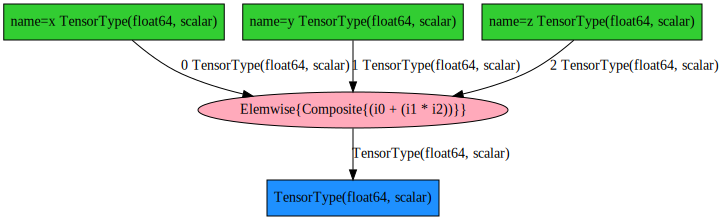

In [6]:
SVG(viz_ofg(f.maker.fgraph.toposort()[0]))

## OFG node 2

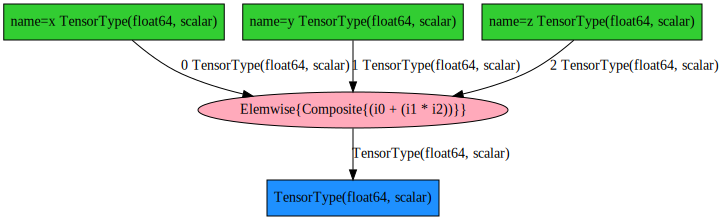

In [15]:
SVG(viz_ofg(f.maker.fgraph.toposort()[1]))

In [30]:
ofg2 = f.maker.fgraph.toposort()[1]

In [31]:
ofg2.inputs

[x, y, z]

In [34]:
ofg2.op.fn.maker.fgraph.toposort()

[Elemwise{Composite{(i0 + (i1 * i2))}}(x, y, z)]

In [35]:
ofg2.op.fn.maker.fgraph.toposort()[0].inputs

[x, y, z]

# Example 2 

In [24]:
x, y, z = tht.scalars('xyz')
e = x * y
o = th.OpFromGraph([x, y], [e])
e2 = o(x, y) + z
o2 = th.OpFromGraph([x, y, z], [e2])
e3 = o2(x, y, z) + z
f = th.function([x, y, z], [e3])

In [21]:
d3p.d3print(f, 'example2/index.html')

[Open](./example2/index.html)

## OFG node 1 

In [18]:
topo = f.maker.fgraph.toposort()

In [19]:
topo

[<theano.compile.builders.OpFromGraph object at 0x112538910>(x, y, z),
 Elemwise{Add}[(0, 0)](<theano.compile.builders.OpFromGraph object at 0x112538910>.0, z)]

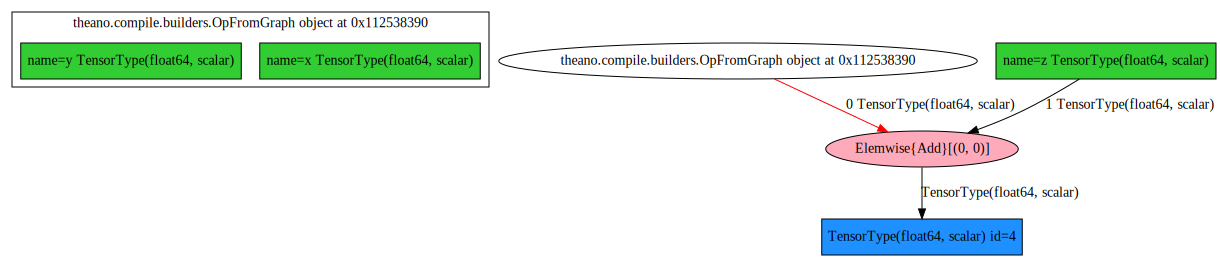

In [20]:
ofg1 = f.maker.fgraph.toposort()[0]
SVG(viz_ofg(ofg1))

In [25]:
ofg2 = f.maker.fgraph.toposort()[1]

In [26]:
ofg2.inputs

[<theano.compile.builders.OpFromGraph object at 0x1124a4f90>.0, z]

In [21]:
ofg1.inputs

[x, y, z]

## OFG node 2

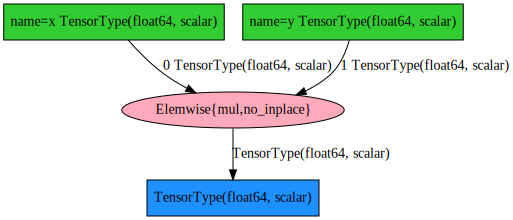

In [46]:
ofg2 = ofg1.op.fn.maker.fgraph.toposort()[0]
SVG(viz_ofg(ofg2))